In [ ]:
## Instalowanie modułów

# modules for iris dataset
!pip3 install -U ucimlrepo 
!pip3 install -U pandas
!pip3 install -U certifi

#other modules
!pip3 install -U numpy
!pip3 install -U matplotlib
!pip3 install -U scikit-learn
!pip3 install -U jinja2


In [2]:
## Importowanie modułów

from ucimlrepo import fetch_ucirepo

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
## sample code to fetch iris dataset from UCI repository

# fetch dataset 
iris = fetch_ucirepo(id=53) 
  
# data (as pandas dataframes) 
X = iris.data.features 
y = iris.data.targets 
  
# metadata 
print(iris.metadata) 
  
# variable information 
print(iris.variables) 


{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'published_in': 'Significance, 2021', 'year': 2021, 'url': 'https://www.semanticscholar.org/paper/4599862ea877863669a6a8e63a3c707a787d5d7e', 'doi': '1740-9713.01589'}, 'add

In [25]:
## Przygotowanie eksperymentów

# Walidacjia krzyżowa
kf = KFold(n_splits=5, shuffle=True, random_state=42) # 5 podziałów, tasowanie, seed

# DataFrame do przechowywania wyników
results = pd.DataFrame(columns=["Model", "Parameter", "Value", "Metric", "Score"])

# Modele
models = {
    "SVM": SVC(random_state=3),
    "Decision Tree": DecisionTreeClassifier(random_state=3)
}
# random_state - Controls the pseudo random number generation for shuffling the data for probability estimates. Ignored when probability is False. Pass an int for reproducible output across multiple function calls

# Eksperyment
def run_experiment(model, param_name, param_values):
    scoring_types = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
    for scoring in scoring_types:
        for value in param_values:
            setattr(model, param_name, value)
            scores = cross_val_score(model, X, y, cv=kf, scoring=scoring)
            results.loc[len(results)] = [model.__class__.__name__, param_name, value, scoring, scores.mean()]


In [ ]:
## Uruchomienie eksperymentów

# Reshape y into a 1-dimensional array - terminal mi kazał to zrobić
# y = np.ravel(y)

# SVM
run_experiment(models["SVM"], "C", [0.1, 1, 10, 100])
run_experiment(models["SVM"], "kernel", ["linear", "poly", "rbf", "sigmoid"])
run_experiment(models["SVM"], "iteration", [100, 1000, 10000])

# Decision Tree
run_experiment(models["Decision Tree"], "depth", [1, 2, 3, 4, 5])
run_experiment(models["Decision Tree"], "criterion", ["gini", "entropy", "log_loss"])
run_experiment(models["Decision Tree"], "splitter", ["best", "random"])



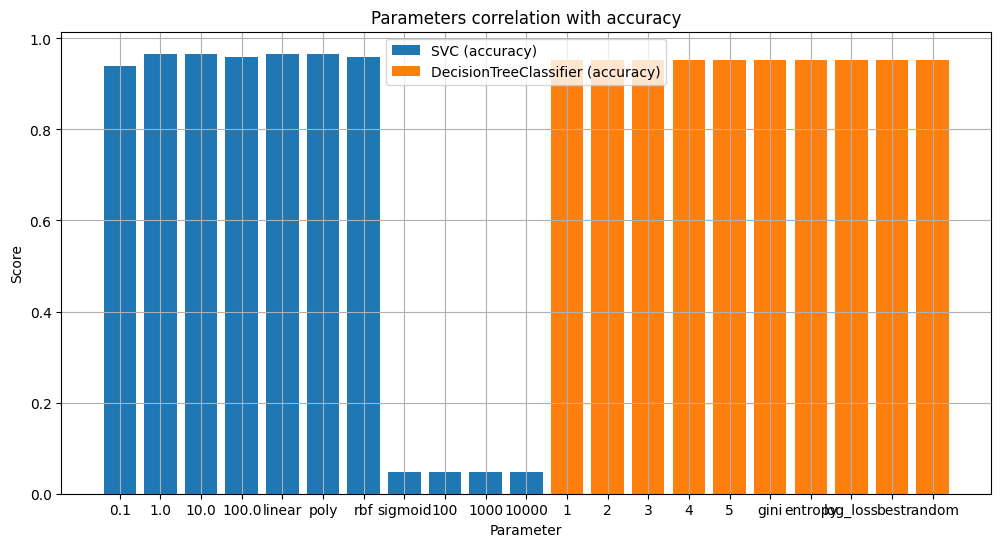

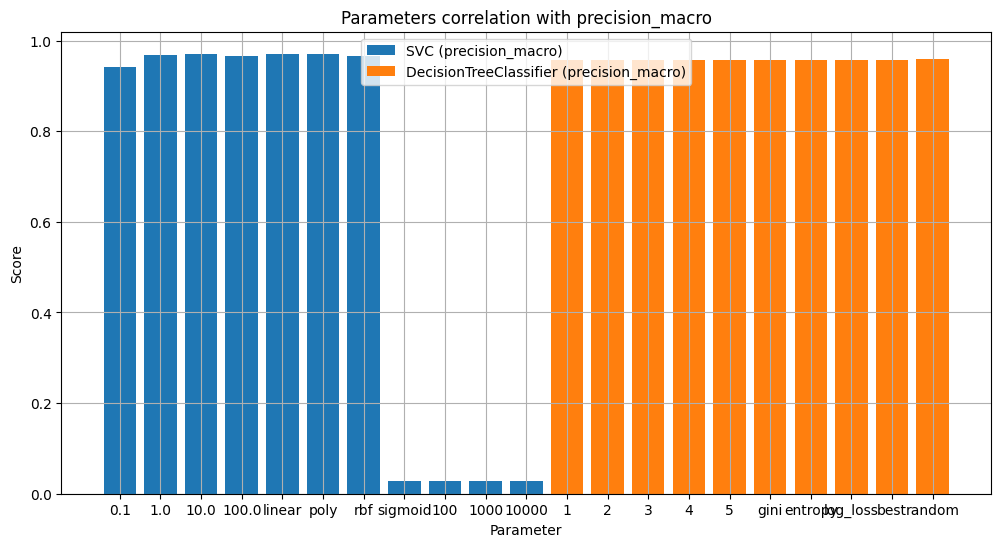

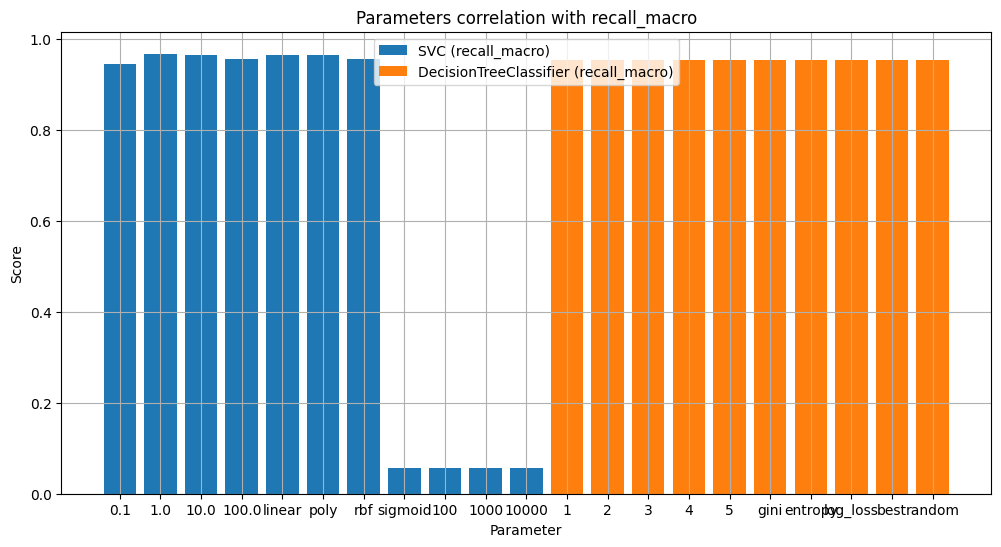

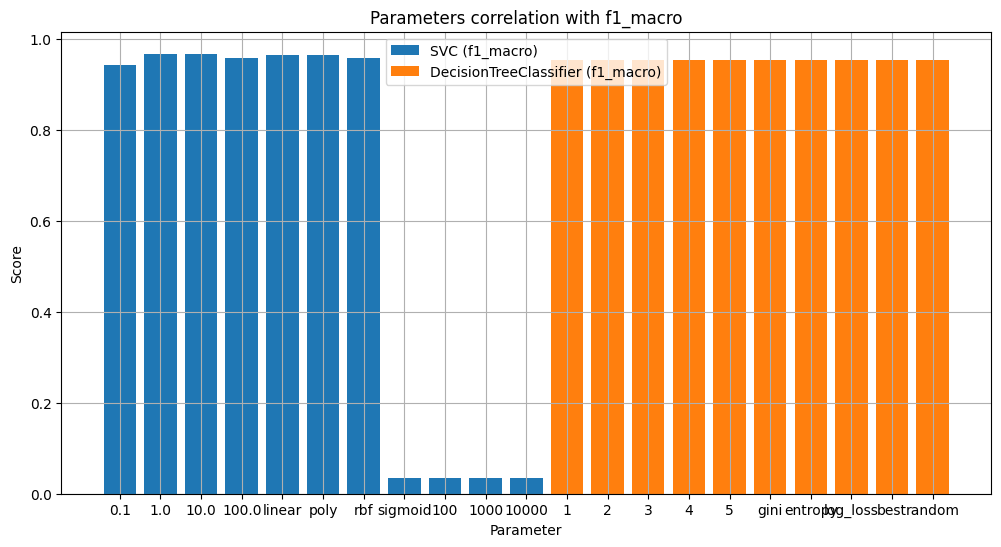

In [30]:
# Wykresy
for metric in results['Metric'].unique():
    plt.figure(figsize=(12, 6))
    for model_name in results['Model'].unique():
        model_data = results[(results['Model'] == model_name) & (results['Metric'] == metric)]
        if not model_data.empty:
            plt.bar(model_data['Value'].astype(str), model_data['Score'], label=f'{model_name} ({metric})')

    plt.title(f'Parameters correlation with {metric}')
    plt.xlabel('Parameter')
    plt.ylabel('Score')
    plt.legend()
    plt.grid(True)
    plt.show()

In [31]:
# Zapisywanie wyników do pliku CSV
results.to_csv("classification_results.csv", index=False)


In [28]:
# Eksport wyników do LaTeX
print(results.to_latex(index=False))


\begin{tabular}{llllr}
\toprule
Model & Parameter & Value & Metric & Score \\
\midrule
SVC & C & 0.100000 & accuracy & 0.940000 \\
SVC & C & 1.000000 & accuracy & 0.966667 \\
SVC & C & 10.000000 & accuracy & 0.966667 \\
SVC & C & 100.000000 & accuracy & 0.960000 \\
SVC & C & 0.100000 & precision_macro & 0.941717 \\
SVC & C & 1.000000 & precision_macro & 0.967222 \\
SVC & C & 10.000000 & precision_macro & 0.971453 \\
SVC & C & 100.000000 & precision_macro & 0.965527 \\
SVC & C & 0.100000 & recall_macro & 0.943990 \\
SVC & C & 1.000000 & recall_macro & 0.967222 \\
SVC & C & 10.000000 & recall_macro & 0.964921 \\
SVC & C & 100.000000 & recall_macro & 0.956402 \\
SVC & C & 0.100000 & f1_macro & 0.940851 \\
SVC & C & 1.000000 & f1_macro & 0.966981 \\
SVC & C & 10.000000 & f1_macro & 0.965934 \\
SVC & C & 100.000000 & f1_macro & 0.957527 \\
SVC & kernel & linear & accuracy & 0.966667 \\
SVC & kernel & poly & accuracy & 0.966667 \\
SVC & kernel & rbf & accuracy & 0.960000 \\
SVC & kernel & si